In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("AAPL.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [6]:
X = data[['High','Low','Open','Volume']].values
y = data['Close'].values

In [7]:
X

array([[1.28906000e-01, 1.28348000e-01, 1.28348000e-01, 4.69033600e+08],
       [1.22210000e-01, 1.21652000e-01, 1.22210000e-01, 1.75884800e+08],
       [1.13281000e-01, 1.12723000e-01, 1.13281000e-01, 1.05728000e+08],
       ...,
       [1.37339996e+02, 1.32160004e+02, 1.34289993e+02, 9.15330000e+07],
       [1.32389999e+02, 1.29039993e+02, 1.32080002e+02, 1.08123900e+08],
       [1.33080002e+02, 1.29809998e+02, 1.30070007e+02, 1.34118500e+08]])

In [8]:
y

array([1.28348000e-01, 1.21652000e-01, 1.12723000e-01, ...,
       1.35429993e+02, 1.30059998e+02, 1.31559998e+02])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [10]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[ 8.36552631e-01  7.73402300e-01 -6.10500516e-01  3.90620869e-12]
0.0008095613312235628


In [11]:
predicted = regressor.predict(X_test)
print(predicted)

[0.38934549 0.36954658 0.22756485 ... 0.13242307 0.59556131 1.36574001]


In [12]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
data1.head(20)

,Actual,Predicted
0,0.389509,0.389345
1,0.368304,0.369547
2,0.225446,0.227565
3,0.465536,0.467344
4,0.356585,0.361624
5,0.191964,0.195672
6,0.464286,0.476336
7,0.238839,0.239304
8,4.446071,4.399575
9,43.200001,43.371093


In [13]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.07263421024659986
Mean Squared Error: 0.059571193117487646
Root Mean Squared Error: 0.24407210638966437


<AxesSubplot:>

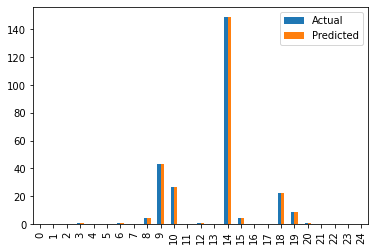

In [20]:
graph = data1.head(25)
graph.plot(kind='bar')